## NBA Career Prediction Experiment

In [446]:
experiment_label = 'g4_report_draft02'

## Set up

In [447]:
import pandas as pd
import numpy as np
from joblib import dump, load  # simpler than pickle!
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [448]:
#load data

data_path = '../data/raw/uts-advdsi-nba-career-prediction'

train_raw = pd.read_csv(data_path + '/train.csv')
test_raw = pd.read_csv(data_path + '/test.csv')


In [449]:
#shapes & head

print(train_raw.shape)
print(test_raw.shape)

train_raw.head()

(8000, 22)
(3799, 21)


,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [450]:
test_raw.head()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,...,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,...,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,3,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,...,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,...,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,...,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [451]:
# count negatives
print(train_raw.where(train_raw < 0).count())

Id_old            0
Id                0
GP                2
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3P Made        1629
3PA            1658
3P%             878
FTM               0
FTA               0
FT%               1
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK            1048
TOV               0
TARGET_5Yrs       0
dtype: int64


In [452]:
len(train_raw[(train_raw['3P%'] < 0) | (train_raw['3P Made'] < 0) | (train_raw['3PA'] < 0)])

2192

In [453]:
len(train_raw[(train_raw['3P%'] < 0) | (train_raw['3P Made'] < 0) | (train_raw['3PA'] < 0) | (train_raw['BLK'] < 0)])

3046

In [454]:
#variable descriptions
train_raw.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


## Decisions

We will drop selected collinear variables.

We will set negative values to ABS(value); the numbers appear sensible but for the sign and there are over 3000 observations with one or more negatives.

and TARGET_5Yrs is our target.

## Cleaning

In [455]:
train = train_raw.copy()
test = test_raw.copy()

In [456]:
cols_drop = ['Id_old', 'Id', 'MIN', 'FGM', 'FGA', 'TOV', '3PA', 'FTM', 'FTA', 'REB']
train.drop(cols_drop, axis=1, inplace=True)
test.drop(cols_drop, axis=1, inplace=True)

In [457]:
train.head()

,GP,PTS,FG%,3P Made,3P%,FT%,OREB,DREB,AST,STL,BLK,TARGET_5Yrs
0,80,7.8,45.7,0.1,22.6,72.1,2.2,2.0,3.2,1.1,0.2,1
1,75,10.5,55.1,-0.3,34.9,67.8,3.6,3.7,0.7,0.5,0.6,1
2,85,4.5,42.8,0.4,34.3,75.7,0.6,1.8,0.8,0.4,0.2,1
3,63,8.2,52.5,0.3,23.7,66.9,0.8,2.0,1.8,0.4,0.1,1
4,63,3.7,50.8,0.5,13.7,54.0,2.4,2.7,0.4,0.4,0.6,1


In [458]:
test.head()

,GP,PTS,FG%,3P Made,3P%,FT%,OREB,DREB,AST,STL,BLK
0,56,4.0,43.7,0.1,7.3,63.4,1.2,0.8,0.4,0.2,0.3
1,43,10.1,46.0,0.6,35.1,75.3,0.5,0.9,3.5,0.6,0.0
2,82,11.3,45.6,0.5,44.8,71.2,1.3,3.3,2.5,1.3,0.3
3,86,18.8,42.9,0.5,13.5,70.9,1.5,3.2,4.1,0.9,0.1
4,58,4.7,40.0,0.5,38.7,76.9,0.2,0.6,1.5,0.5,-0.4


In [459]:
# Negative values do not make sense in this context

def clean_negatives(strategy, df):
    
    if strategy=='abs':
        df = abs(df)
    if strategy=='null':
        df[df < 0] = None
    if strategy=='mean':
        df[df < 0] = None
        df.fillna(df.mean(), inplace=True)     
    if strategy=='median':
        df[df < 0] = None
        df.fillna(df.median(), inplace=True)   
    
    return(df)


In [460]:
negatives_strategy = 'keep'

train = clean_negatives(negatives_strategy, train)
test = clean_negatives(negatives_strategy, test)


In [461]:
train.head()

,GP,PTS,FG%,3P Made,3P%,FT%,OREB,DREB,AST,STL,BLK,TARGET_5Yrs
0,80,7.8,45.7,0.1,22.6,72.1,2.2,2.0,3.2,1.1,0.2,1
1,75,10.5,55.1,-0.3,34.9,67.8,3.6,3.7,0.7,0.5,0.6,1
2,85,4.5,42.8,0.4,34.3,75.7,0.6,1.8,0.8,0.4,0.2,1
3,63,8.2,52.5,0.3,23.7,66.9,0.8,2.0,1.8,0.4,0.1,1
4,63,3.7,50.8,0.5,13.7,54.0,2.4,2.7,0.4,0.4,0.6,1


In [462]:
train_target = train.pop('TARGET_5Yrs')

In [463]:
#examine shapes

print('train:' + str(train.shape))
print('test:' + str(test.shape))

train:(8000, 11)
test:(3799, 11)


In [464]:
# target class balance check
from collections import Counter

counter = Counter(train_target)
print(counter)

Counter({1: 6669, 0: 1331})


## Splitting of data

In [465]:
# set training data and validation data

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_target, test_size=0.2, random_state=8)


## Feature engineering - Gaussian clusters

In [466]:
from sklearn.mixture import GaussianMixture

In [467]:
def optimal_gaussian_clusters(X, min, max):
    
    import numpy as np
    import itertools

    from scipy import linalg
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    from sklearn import mixture

    lowest_bic = np.infty
    bic = []
    n_components_range = range(min, max+1)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    plt.figure(figsize=(8, 6))
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    #splot = plt.subplot(2, 1, 2)
    #Y_ = clf.predict(X)
    #for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
    #                                           color_iter)):
    #    v, w = linalg.eigh(cov)
    #    if not np.any(Y_ == i):
    #        continue
    #    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
#        angle = np.arctan2(w[0][1], w[0][0])
#        angle = 180. * angle / np.pi  # convert to degrees
#        v = 2. * np.sqrt(2.) * np.sqrt(v)
#        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#        ell.set_clip_box(splot.bbox)
#        ell.set_alpha(.5)
#        splot.add_artist(ell)

#    plt.xticks(())
#    plt.yticks(())
#    plt.title(f'Selected GMM: {best_gmm.covariance_type} model, '
#              f'{best_gmm.n_components} components')
#    plt.subplots_adjust(hspace=.35, bottom=.02)
#    plt.show()
    

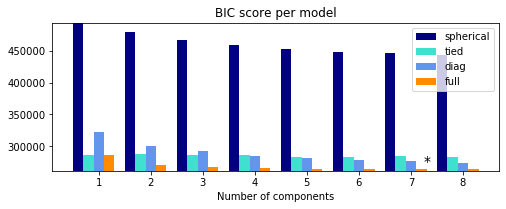

In [468]:
optimal_gaussian_clusters(X_train, 1, 8)

In [469]:
gm = GaussianMixture(n_components=7, 
                     covariance_type = 'full',  #{‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                     tol = 0.0001,
                     init_params = 'kmeans',  #{‘kmeans’, ‘random’}, default=’kmeans’
                     n_init = 1,
                     max_iter = 100,
                     random_state=8,
                    )

In [470]:
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.0001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [471]:
clusters_train = gm.predict(X_train)
clusters_val = gm.predict(X_val)
clusters_test = gm.predict(test)

### Decision about clusters:

EXCLUDE as new feature.

In [472]:
include_clusters = False

In [473]:
if include_clusters:
    X_train_unscaled = X_train.assign(cluster = clusters_train)
    X_val_unscaled = X_val.assign(cluster = clusters_val)
    test_unscaled = test.assign(cluster = clusters_test)
    
    # How do the clusters differ in career outcomes?
    train_cluster_check = X_train_unscaled.copy()
    train_cluster_check = train_cluster_check.assign(target = y_train)
    train_cluster_check.groupby(['cluster', 'target'])['GP'].count()
    
else:
    X_train_unscaled = X_train
    X_val_unscaled = X_val
    test_unscaled = test

In [474]:
X_train_unscaled.head()

,GP,PTS,FG%,3P Made,3P%,FT%,OREB,DREB,AST,STL,BLK
3617,64,4.3,43.0,-0.2,11.9,69.2,0.6,1.7,0.6,0.4,0.1
1120,81,7.6,44.8,0.4,12.1,79.0,1.7,4.0,0.7,0.6,0.1
3873,50,1.4,36.4,0.0,-3.1,68.6,0.1,0.2,1.5,0.4,-0.3
153,72,5.0,40.4,0.1,25.3,48.4,0.7,2.0,1.1,0.5,0.2
2960,45,6.1,42.1,0.1,-2.7,62.0,1.0,1.5,1.5,0.4,0.3


## Scaling of data

In [475]:
#transformations

# fit scaler to training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
dump(scaler, '../models/aj_' + experiment_label + '_scaler.joblib')

# transform val & test data
X_val = scaler.transform(X_val_unscaled)
test = scaler.transform(test_unscaled)

# Modelling

In [476]:
# Define model

from sklearn.linear_model import LogisticRegressionCV 

initial_model = LogisticRegressionCV(class_weight='balanced',
                             random_state=8)

In [477]:
# Fit model

initial_model.fit(X_train, y_train)


LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=8, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [478]:
#dump(initial_model,  '../models/aj_' + experiment_label + '_initial.joblib')

In [479]:
y_train_preds = initial_model.predict(X_train)
y_val_preds = initial_model.predict(X_val)

In [480]:
def eval_report(X, true, pred):
    
    import numpy as np
    import pandas as pd
    from sklearn import metrics

    unique_label = np.unique([true, pred])
    cmtx = pd.DataFrame(
        metrics.confusion_matrix(true, pred, labels=unique_label), 
        index=['true:{:}'.format(x) for x in unique_label], 
        columns=['pred:{:}'.format(x) for x in unique_label]
    )
    print("Confusion matrix:")
    print(cmtx)
    print("")
    print(metrics.classification_report(true, pred))
    print("")
    print('ROC AUC: {:.4f}'.format(metrics.roc_auc_score(true, pred), ))


In [481]:
# model performance on training data

eval_report(X_train, y_train, y_train_preds)

Confusion matrix:
        pred:0  pred:1
true:0     709     365
true:1    1931    3395

              precision    recall  f1-score   support

           0       0.27      0.66      0.38      1074
           1       0.90      0.64      0.75      5326

    accuracy                           0.64      6400
   macro avg       0.59      0.65      0.56      6400
weighted avg       0.80      0.64      0.69      6400


ROC AUC: 0.6488


In [482]:
# model performance on validation data

eval_report(X_val, y_val, y_val_preds)

Confusion matrix:
        pred:0  pred:1
true:0     172      85
true:1     509     834

              precision    recall  f1-score   support

           0       0.25      0.67      0.37       257
           1       0.91      0.62      0.74      1343

    accuracy                           0.63      1600
   macro avg       0.58      0.65      0.55      1600
weighted avg       0.80      0.63      0.68      1600


ROC AUC: 0.6451


## Model tuning

In [483]:
# model_selection tools

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


In [487]:
# Define model
model = LogisticRegressionCV(class_weight='balanced',
                             penalty='elasticnet',
                             solver='saga',
                             scoring='roc_auc',
                             random_state=8)

# Define parameters
param_grid = {
    'max_iter': [100, 150, 200, 250],
    'Cs': [15, 20, 25],
    'l1_ratios': [[0]]
}

# Define cv
cv = RepeatedStratifiedKFold(
    n_splits=10, n_repeats=3, random_state=8
)

# Define grid search
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid, 
                    scoring='roc_auc', 
                    cv=cv,
                    verbose=1,
                    n_jobs =-1
                   )


In [488]:
# Fit model

grid.fit(X_train, y_train)


Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.0min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=8),
             error_score=nan,
             estimator=LogisticRegressionCV(Cs=10, class_weight='balanced',
                                            cv=None, dual=False,
                                            fit_intercept=True,
                                            intercept_scaling=1.0,
                                            l1_ratios=None, max_iter=100,
                                            multi_class='auto', n_jobs=None,
                                            penalty='elasticnet',
                                            random_state=8, refit=True,
                                            scoring='roc_auc', solver='saga',
                                            tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'Cs': [15, 20, 25], 'l1_ratios': [[0]],
                         'max_iter': [100, 150, 200, 250]},
             

In [489]:
# Score of best model

mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

grid.best_params_, mean_score, std_score

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")

Best parameters: {'Cs': 20, 'l1_ratios': [0], 'max_iter': 100}
Mean CV score:  0.700448
Standard deviation of CV score:  0.022172


In [490]:
#save model to file

dump(grid,  '../models/aj_' + experiment_label + '_grid.joblib')

['../models/aj_g4_report_draft02_grid.joblib']

In [491]:
#predictions for train & validation sets

y_train_preds = grid.predict(X_train)
y_val_preds = grid.predict(X_val)

## Fit best model

In [492]:
# here is where we take the best hyperparamters from the hyperparameter search and fit the model again.

best_model = LogisticRegressionCV(class_weight='balanced',
                                Cs=20,
                                max_iter=100,
                                penalty='elasticnet',
                                solver='saga',
                                l1_ratios=[0],
                                scoring='roc_auc',
                                random_state=8,
                                cv=6
                               ) 

best_model.fit(X_train, y_train)


LogisticRegressionCV(Cs=20, class_weight='balanced', cv=6, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=[0],
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='elasticnet', random_state=8, refit=True,
                     scoring='roc_auc', solver='saga', tol=0.0001, verbose=0)

In [493]:
#save model to file

dump(best_model,  '../models/aj_' + experiment_label + '_best.joblib')

['../models/aj_g4_report_draft02_best.joblib']

In [494]:
#predictions for train & validation sets

y_train_preds = best_model.predict(X_train)
y_val_preds = best_model.predict(X_val)

## Evaluation

In [495]:
# model performance on training data

eval_report(X_train, y_train, y_train_preds)

Confusion matrix:
        pred:0  pred:1
true:0     712     362
true:1    1938    3388

              precision    recall  f1-score   support

           0       0.27      0.66      0.38      1074
           1       0.90      0.64      0.75      5326

    accuracy                           0.64      6400
   macro avg       0.59      0.65      0.56      6400
weighted avg       0.80      0.64      0.69      6400


ROC AUC: 0.6495


In [496]:
# model performance on validation data

eval_report(X_val, y_val, y_val_preds)

Confusion matrix:
        pred:0  pred:1
true:0     172      85
true:1     510     833

              precision    recall  f1-score   support

           0       0.25      0.67      0.37       257
           1       0.91      0.62      0.74      1343

    accuracy                           0.63      1600
   macro avg       0.58      0.64      0.55      1600
weighted avg       0.80      0.63      0.68      1600


ROC AUC: 0.6448


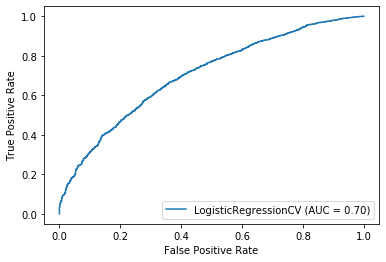

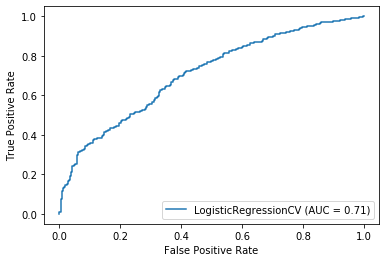

In [497]:
# ROC curves

import matplotlib.pyplot as plt  
from sklearn import metrics
metrics.plot_roc_curve(best_model, X_train, y_train)
plt.show() 
metrics.plot_roc_curve(best_model, X_val, y_val)
plt.show() 

## Coefficients

In [498]:
def array_to_feature_table(a, transpose, label):

    table = pd.DataFrame(a).T
    if transpose:
        table = table.T
    table.index = X_train_unscaled.columns
    table.columns = [label]
    return table
    

In [499]:
coef_table = array_to_feature_table(best_model.coef_, False, 'coefficient')
coef_table

,coefficient
GP,0.483431
PTS,0.003589
FG%,0.215847
3P Made,0.015253
3P%,0.047829
FT%,0.062843
OREB,0.295725
DREB,-0.053922
AST,0.140886
STL,-0.023245


## Variable importance by permutation


In [500]:
from sklearn.inspection import permutation_importance

In [501]:
r = permutation_importance(
    best_model, X_train, y_train,
    n_repeats=30,
    random_state=8
)

In [502]:
table = pd.DataFrame(r.importances_mean)
table.index = X_train_unscaled.columns

In [503]:
importances = array_to_feature_table(r.importances_mean, True, 'importance')
importances

,importance
GP,0.092862
PTS,-0.000007
FG%,0.015704
3P Made,0.000186
3P%,0.001202
FT%,0.001641
OREB,0.027228
DREB,0.000630
AST,0.006601
STL,0.000161


# Apply to test data for submission

In [504]:
y_test_preds = best_model.predict(test)


In [505]:
y_test_probs = best_model.predict_proba(test)

In [506]:
submission = pd.DataFrame({'Id': range(0, len(y_test_probs)), 'TARGET_5Yrs': [p[1] for p in y_test_probs]})

In [507]:
submission.head()

,Id,TARGET_5Yrs
0,0,0.470031
1,1,0.445094
2,2,0.722758
3,3,0.757522
4,4,0.419140


In [508]:
submission.to_csv('../reports/aj_' + experiment_label + 'submission.csv',
                 index=False,
                 )

In [509]:
print(test)

[[-0.39572039 -0.75601202 -0.14638612 ... -0.89893642 -1.10204721
   0.06457072]
 [-1.15730203  0.66389962  0.22646889 ...  1.37117439 -0.12153046
  -0.28974702]
 [ 1.12744291  0.9432265   0.16162454 ...  0.63888058  1.59437386
   0.06457072]
 ...
 [-0.57147    -1.19827958 -0.24365264 ... -0.89893642 -0.61178883
  -0.0535352 ]
 [ 1.53752533  1.68809818  0.09678019 ...  1.51763315  1.59437386
   0.06457072]
 [-0.45430359 -0.98878442 -0.37334134 ... -0.75247766 -0.85691802
  -0.0535352 ]]


In [510]:
print(submission)

        Id  TARGET_5Yrs
0        0     0.470031
1        1     0.445094
2        2     0.722758
3        3     0.757522
4        4     0.419140
...    ...          ...
3794  3794     0.766429
3795  3795     0.441299
3796  3796     0.383472
3797  3797     0.796611
3798  3798     0.417851

[3799 rows x 2 columns]


In [511]:
print(X_val)

[[-1.21588524 -1.08189338  0.37236868 ... -0.9721658  -0.85691802
  -0.28974702]
 [-0.21997078 -1.0353389  -0.5516633  ... -0.16664261 -0.61178883
  -0.0535352 ]
 [ 0.42444446  1.36221682  0.50205737 ... -0.89893642 -0.61178883
   0.18267663]
 ...
 [ 0.24869485  0.66389962  2.5122322  ...  0.12627491  1.10411549
   0.06457072]
 [-1.09871883  0.0121369  -0.47060787 ... -0.16664261  0.12359873
   0.18267663]
 [ 0.9516933   1.71137542 -0.51924113 ...  1.29794501  1.34924467
  -0.17164111]]
